#`Feature Importance by Random Forest`

---



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier
random.seed(0)

In [83]:
df = pd.read_csv('cleaned3.csv')
df.head()

,Unnamed: 0,cancel,year,zip.code,ni.age,len.at.res,credit,premium,gender,ni.marital.status,...,house.color_blue,house.color_red,house.color_white,house.color_yellow,dwelling_Condo,dwelling_House,dwelling_Tenant,coverage_A,coverage_B,coverage_C
0,0,0,2013,98004.0,37.0,18.000000,2,950.507336,0,0.0,...,1,0,0,0,0,0,1,0,0,1
1,1,0,2013,85017.0,40.0,17.000000,1,909.346046,0,1.0,...,0,0,1,0,1,0,0,1,0,0
2,2,0,2013,80021.0,45.0,14.000000,2,897.084502,1,0.0,...,0,0,1,0,0,1,0,1,0,0
3,3,0,2013,85002.0,45.0,24.366136,2,979.039007,1,0.0,...,0,1,0,0,0,1,0,1,0,0
4,4,0,2013,50001.0,36.0,16.000000,2,932.379027,1,1.0,...,0,0,0,1,0,1,0,0,0,1


In [0]:
df = df.drop("Unnamed: 0", 1)
df = df.drop("zip.code", 1)
df = df.drop("year",1)

In [0]:
# shuffle the dataframe
df = df.sample(frac = 1)

In [86]:
df.shape

(1025272, 30)

In [0]:
y = df[['cancel']]

In [0]:
X = df.iloc[:,1:df.shape[1]]

In [0]:
# Only using 10000 obs to show a rough idea

X_trial = X[1:10000]
y_trial = y[1:10000]

In [90]:
X.shape[1]

29

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 1) premium                       0.139746
 2) ni.age                        0.116806
 3) tenure                        0.102329
 4) len.at.res                    0.099487
 5) n.children                    0.071529
 6) credit                        0.064988
 7) n.adults                      0.056925
 8) gender                        0.025562
 9) ni.marital.status             0.020185
10) coverage_C                    0.019427
11) house.color_white             0.019145
12) dwelling_House                0.018334
13) house.color_blue              0.018032
14) coverage_A                    0.018024
15) coverage_B                    0.017245
16) house.color_red               0.017054
17) state_IA                      0.016450
18) claim.ind                     0.016411
19) dwelling_Condo                0.016253
20) sales.channel_Broker          0.016162
21) state_AZ                      0.015253
22) dwelling_Tenant               0.014639
23) sales.channel_Phone           0.012945
24) state_C

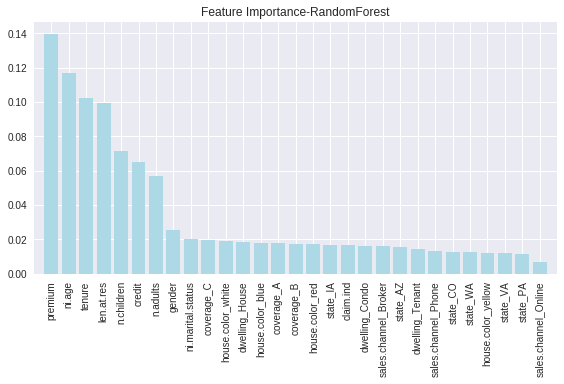

In [91]:

forest=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)


X_train=X_trial
y_train=y_trial

forest.fit(X_train,y_train)
importances=forest.feature_importances_

feat_labels = X.columns
indices=np.argsort(importances)[::-1]

X_train=np.array(X_train)
N=X_train.shape[1]
for f in range(X.shape[1]):
    # assess feature importance
    print ("%2d) %-*s %f" % (f+1,X.shape[1],feat_labels[indices[f]],importances[indices[f]]) )

#Visualization of feature importance
plt.title('Feature Importance-RandomForest')

plt.bar(range(X.shape[1]),importances[indices[:X.shape[1]]],color='lightblue',align='center')
plt.xticks(range(X.shape[1]),np.array(feat_labels)[indices[:X.shape[1]]],rotation=90)

plt.xlim([-1,X.shape[1]])
plt.tight_layout()
plt.show()
